**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

# Initial End-to-End Workflow (Start)

In [1]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [5]:
X.shape, y.shape

((27455, 784), (27455,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x247fd35a490>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0]))

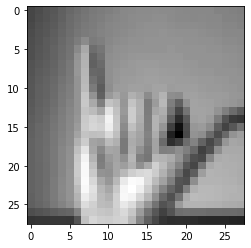

In [15]:
plt.imshow(X[0], cmap='gray'), y[2]

In [16]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [37]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.7326

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 26s 21ms/step - loss: 0.8774 - accuracy: 0.7326 - val_loss: 0.0267 - val_accuracy: 0.9935
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9994

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/20
778/782 [============================>.] - ETA: 0s - loss: 5.8701e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 16ms/step - loss: 5.9076e-04 - accuracy: 1.0000 - val_loss: 4.7529e-04 - val_accuracy: 1.0000
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9893

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 2.4525e-04 - val_accuracy: 1.0000
Epoch 5/20
779/782 [============================>.] - ETA: 0s - loss: 1.2933e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.2916e-04 - accuracy: 1.0000 - val_loss: 1.0227e-04 - val_accuracy: 1.0000
Epoch 6/20
782/782 [==============================] - ETA: 0s - loss: 6.1190e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 6.1190e-05 - accuracy: 1.0000 - val_loss: 5.5581e-05 - val_accuracy: 1.0000
Epoch 7/20
779/782 [============================>.] - ETA: 0s - loss: 3.5186e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 3.5120e-05 - accuracy: 1.0000 - val_loss: 3.2938e-05 - val_accuracy: 1.0000
Epoch 8/20
778/782 [============================>.] - ETA: 0s - loss: 2.1345e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 16ms/step - loss: 2.1343e-05 - accuracy: 1.0000 - val_loss: 2.0919e-05 - val_accuracy: 1.0000
Epoch 9/20
779/782 [============================>.] - ETA: 0s - loss: 1.3634e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.3638e-05 - accuracy: 1.0000 - val_loss: 1.3809e-05 - val_accuracy: 1.0000
Epoch 10/20
778/782 [============================>.] - ETA: 0s - loss: 9.0006e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 17ms/step - loss: 8.9994e-06 - accuracy: 1.0000 - val_loss: 8.8405e-06 - val_accuracy: 1.0000
Epoch 11/20
780/782 [============================>.] - ETA: 0s - loss: 5.8028e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 5.8089e-06 - accuracy: 1.0000 - val_loss: 5.6665e-06 - val_accuracy: 1.0000
Epoch 12/20
782/782 [==============================] - ETA: 0s - loss: 3.8640e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 3.8640e-06 - accuracy: 1.0000 - val_loss: 3.9938e-06 - val_accuracy: 1.0000
Epoch 13/20
781/782 [============================>.] - ETA: 0s - loss: 2.5768e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 2.5762e-06 - accuracy: 1.0000 - val_loss: 2.6486e-06 - val_accuracy: 1.0000
Epoch 14/20
782/782 [==============================] - ETA: 0s - loss: 1.7138e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 16ms/step - loss: 1.7138e-06 - accuracy: 1.0000 - val_loss: 1.8131e-06 - val_accuracy: 1.0000
Epoch 15/20
782/782 [==============================] - ETA: 0s - loss: 1.1717e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 1.1717e-06 - accuracy: 1.0000 - val_loss: 1.2420e-06 - val_accuracy: 1.0000
Epoch 16/20
779/782 [============================>.] - ETA: 0s - loss: 7.6287e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 7.6705e-07 - accuracy: 1.0000 - val_loss: 8.0546e-07 - val_accuracy: 1.0000
Epoch 17/20
782/782 [==============================] - ETA: 0s - loss: 5.0912e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 5.0912e-07 - accuracy: 1.0000 - val_loss: 5.3233e-07 - val_accuracy: 1.0000
Epoch 18/20
782/782 [==============================] - ETA: 0s - loss: 3.4244e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 3.4244e-07 - accuracy: 1.0000 - val_loss: 4.0079e-07 - val_accuracy: 1.0000
Epoch 19/20
779/782 [============================>.] - ETA: 0s - loss: 2.2810e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 11s 15ms/step - loss: 2.2815e-07 - accuracy: 1.0000 - val_loss: 2.9071e-07 - val_accuracy: 1.0000
Epoch 20/20
780/782 [============================>.] - ETA: 0s - loss: 1.5193e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 11s 15ms/step - loss: 1.5183e-07 - accuracy: 1.0000 - val_loss: 1.6801e-07 - val_accuracy: 1.0000


In [38]:
history.history # Contains the training related information for each epoch

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [66]:
# Saving the history object

# with open('models/intial-end-to-end-history', 'wb') as history_file:
#     pickle.dump(history.history, history_file)

In [20]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [21]:
best_model = keras.models.load_model('models/initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

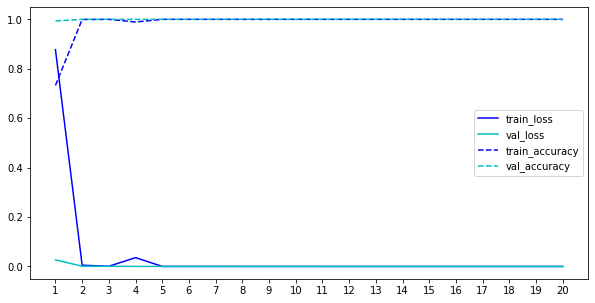

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

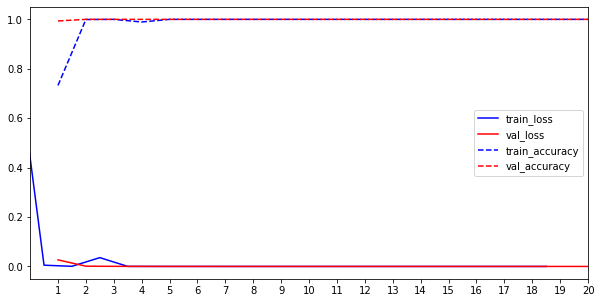

In [23]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch
ax.plot(np.arange(n_epochs)-0.5, h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [50]:
# Defining a function the get the plots
def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    
    ax.plot(np.arange(n_epochs)-0.5, h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

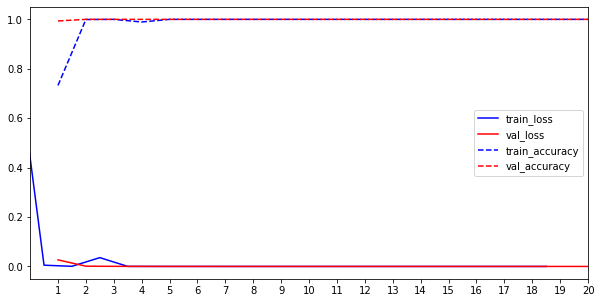

In [25]:
get_train_val_plots(h)

In [26]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [27]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [28]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [29]:
y_test = label_binarizer.transform(y_test)

In [30]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 32s 14ms/step - loss: 87.9661 - accuracy: 0.9405


[87.96614074707031, 0.9404628872871399]

Accuracy: 94%

In [23]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [32]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'])

225/225 [==============================] - 2s 10ms/step - loss: 87.9661 - accuracy: 0.9405
Loss: 87.966 Accuracy: 0.940


### Converting Images to a Sentence

In [205]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [206]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [35]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [36]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [37]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [36]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 288ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 38ms/step
sign language


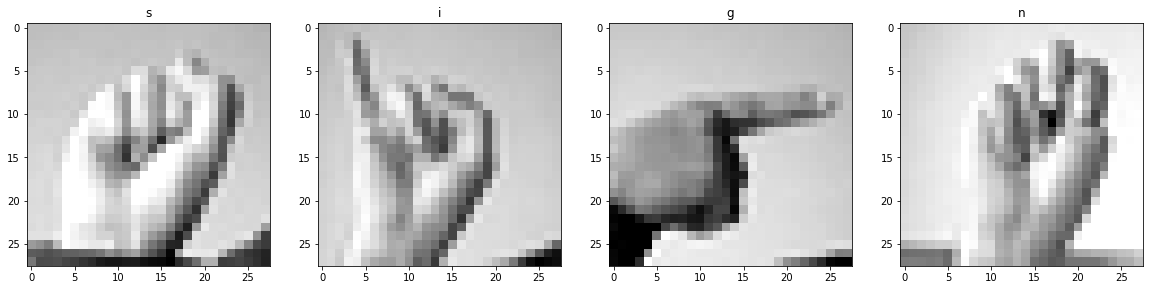

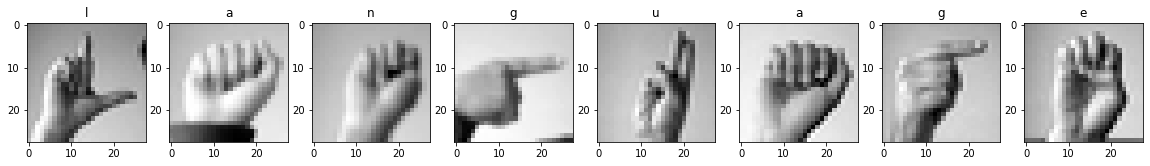

In [44]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [39]:
def test_on_sentence(model, sentence, X_test, y_test, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 16ms/step
The actual sentence is "sign language"
The predicted sentence is "sign language"


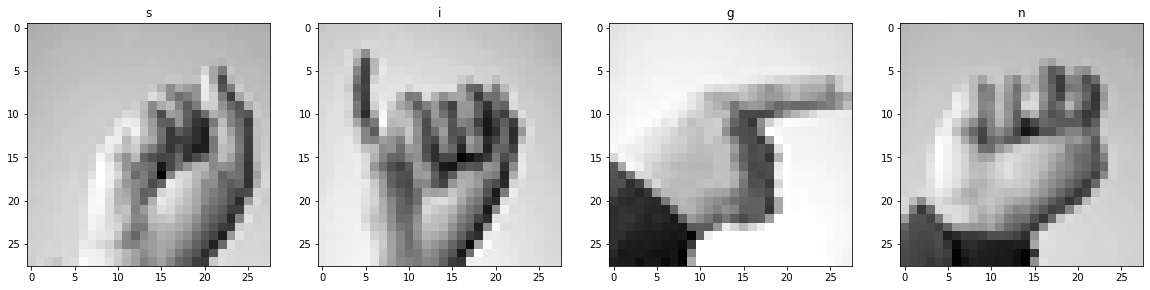

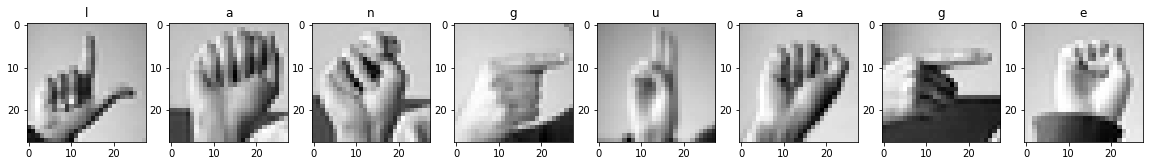

In [112]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'])

# Initial End-to-End Workflow (End)

### Hyperparameter Tuning

1. Convolution and Max Pooling Pairs
2. Number of feature maps
3. Dropout
4. Data Augmentation

### Convolution and Max Pooling Pairs

Before flattening


1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

As the output shape rapidly decreases for the pair = 4 it better to choose among the pair = 1, 2 or 3

In [29]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [30]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [31]:
n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
598/610 [============================>.] - ETA: 0s - loss: 1.2888 - accuracy: 0.6378

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 6ms/step - loss: 1.2717 - accuracy: 0.6428 - val_loss: 0.3912 - val_accuracy: 0.9062
Epoch 2/15
605/610 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9560

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 6ms/step - loss: 0.2066 - accuracy: 0.9562 - val_loss: 0.0849 - val_accuracy: 0.9912
Epoch 3/15
608/610 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9958

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 5s 9ms/step - loss: 0.0514 - accuracy: 0.9958 - val_loss: 0.0299 - val_accuracy: 0.9982
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9997

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 6ms/step - loss: 0.0165 - accuracy: 0.9997 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 5/15
606/610 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9999

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 6ms/step - loss: 0.0073 - accuracy: 0.9999 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 6/15
609/610 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9993

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 6ms/step - loss: 0.0066 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7/15
610/610 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/15
610/610 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 8.6837e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 7ms/step - loss: 8.6799e-04 - accuracy: 1.0000 - val_loss: 7.7809e-04 - val_accuracy: 1.0000
Epoch 10/15
605/610 [============================>.] - ETA: 0s - loss: 5.8230e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 5s 9ms/step - loss: 5.8304e-04 - accuracy: 1.0000 - val_loss: 5.4940e-04 - val_accuracy: 1.0000
Epoch 11/15
610/610 [==============================] - 4s 6ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 12/15
610/610 [==============================] - 4s 6ms/step - loss: 8.4445e-04 - accuracy: 1.0000 - val_loss: 6.3095e-04 - val_accuracy: 1.0000
Epoch 13/15
608/610 [============================>.] - ETA: 0s - loss: 4.8544e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 6ms/step - loss: 4.8522e-04 - accuracy: 1.0000 - val_loss: 4.7309e-04 - val_accuracy: 1.0000
Epoch 14/15
607/610 [============================>.] - ETA: 0s - loss: 3.5215e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 7ms/step - loss: 3.5329e-04 - accuracy: 1.0000 - val_loss: 3.3240e-04 - val_accuracy: 1.0000
Epoch 15/15
605/610 [============================>.] - ETA: 0s - loss: 2.7148e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 4s 7ms/step - loss: 2.7154e-04 - accuracy: 1.0000 - val_loss: 2.5948e-04 - val_accuracy: 1.0000
Epoch 1/15
608/610 [============================>.] - ETA: 0s - loss: 0.9688 - accuracy: 0.7083

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 7s 10ms/step - loss: 0.9668 - accuracy: 0.7090 - val_loss: 0.1467 - val_accuracy: 0.9531
Epoch 2/15
606/610 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9910

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 7s 11ms/step - loss: 0.0455 - accuracy: 0.9910 - val_loss: 0.0085 - val_accuracy: 0.9997
Epoch 3/15
605/610 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9999

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 9ms/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/15
610/610 [==============================] - 6s 9ms/step - loss: 0.0376 - accuracy: 0.9897 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/15
605/610 [============================>.] - ETA: 0s - loss: 9.2055e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 10ms/step - loss: 9.1743e-04 - accuracy: 1.0000 - val_loss: 4.9071e-04 - val_accuracy: 1.0000
Epoch 6/15
603/610 [============================>.] - ETA: 0s - loss: 3.3840e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 5s 9ms/step - loss: 3.3749e-04 - accuracy: 1.0000 - val_loss: 2.7421e-04 - val_accuracy: 1.0000
Epoch 7/15
600/610 [============================>.] - ETA: 0s - loss: 1.9964e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 10ms/step - loss: 1.9890e-04 - accuracy: 1.0000 - val_loss: 1.8108e-04 - val_accuracy: 1.0000
Epoch 8/15
605/610 [============================>.] - ETA: 0s - loss: 1.3324e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 9ms/step - loss: 1.3388e-04 - accuracy: 1.0000 - val_loss: 1.2290e-04 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 9.4069e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 10ms/step - loss: 9.4024e-05 - accuracy: 1.0000 - val_loss: 8.7907e-05 - val_accuracy: 1.0000
Epoch 10/15
599/610 [============================>.] - ETA: 0s - loss: 6.4930e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 5s 8ms/step - loss: 6.5206e-05 - accuracy: 1.0000 - val_loss: 6.4753e-05 - val_accuracy: 1.0000
Epoch 11/15
604/610 [============================>.] - ETA: 0s - loss: 4.5556e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 10ms/step - loss: 4.5509e-05 - accuracy: 1.0000 - val_loss: 3.9519e-05 - val_accuracy: 1.0000
Epoch 12/15
608/610 [============================>.] - ETA: 0s - loss: 3.0262e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 10ms/step - loss: 3.0241e-05 - accuracy: 1.0000 - val_loss: 2.7037e-05 - val_accuracy: 1.0000
Epoch 13/15
608/610 [============================>.] - ETA: 0s - loss: 2.0512e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 7s 12ms/step - loss: 2.0501e-05 - accuracy: 1.0000 - val_loss: 1.9547e-05 - val_accuracy: 1.0000
Epoch 14/15
610/610 [==============================] - ETA: 0s - loss: 1.4227e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 5s 9ms/step - loss: 1.4227e-05 - accuracy: 1.0000 - val_loss: 1.3458e-05 - val_accuracy: 1.0000
Epoch 15/15
610/610 [==============================] - ETA: 0s - loss: 9.9346e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 6s 10ms/step - loss: 9.9346e-06 - accuracy: 1.0000 - val_loss: 9.3704e-06 - val_accuracy: 1.0000
Epoch 1/15
610/610 [==============================] - ETA: 0s - loss: 0.8947 - accuracy: 0.7210

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 9s 13ms/step - loss: 0.8947 - accuracy: 0.7210 - val_loss: 0.0764 - val_accuracy: 0.9777
Epoch 2/15
605/610 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9903

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 8s 13ms/step - loss: 0.0374 - accuracy: 0.9904 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/15
610/610 [==============================] - 6s 10ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.1017 - val_accuracy: 0.9635
Epoch 4/15
610/610 [==============================] - 7s 11ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0222 - val_accuracy: 0.9937
Epoch 5/15
606/610 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 8s 13ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 1.4488e-04 - val_accuracy: 1.0000
Epoch 6/15
610/610 [==============================] - ETA: 0s - loss: 7.7258e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 7.7258e-05 - accuracy: 1.0000 - val_loss: 5.4070e-05 - val_accuracy: 1.0000
Epoch 7/15
606/610 [============================>.] - ETA: 0s - loss: 3.4622e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 8s 12ms/step - loss: 3.4583e-05 - accuracy: 1.0000 - val_loss: 3.0925e-05 - val_accuracy: 1.0000
Epoch 8/15
608/610 [============================>.] - ETA: 0s - loss: 2.0418e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 6s 10ms/step - loss: 2.0388e-05 - accuracy: 1.0000 - val_loss: 1.9665e-05 - val_accuracy: 1.0000
Epoch 9/15
606/610 [============================>.] - ETA: 0s - loss: 1.3087e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 1.3067e-05 - accuracy: 1.0000 - val_loss: 1.3650e-05 - val_accuracy: 1.0000
Epoch 10/15
605/610 [============================>.] - ETA: 0s - loss: 8.9536e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 8.9197e-06 - accuracy: 1.0000 - val_loss: 1.0479e-05 - val_accuracy: 1.0000
Epoch 11/15
604/610 [============================>.] - ETA: 0s - loss: 6.4773e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 6.4600e-06 - accuracy: 1.0000 - val_loss: 7.0963e-06 - val_accuracy: 1.0000
Epoch 12/15
605/610 [============================>.] - ETA: 0s - loss: 4.6440e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 4.6478e-06 - accuracy: 1.0000 - val_loss: 5.8179e-06 - val_accuracy: 1.0000
Epoch 13/15
610/610 [==============================] - ETA: 0s - loss: 3.4811e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 3.4811e-06 - accuracy: 1.0000 - val_loss: 4.2011e-06 - val_accuracy: 1.0000
Epoch 14/15
603/610 [============================>.] - ETA: 0s - loss: 2.4777e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 2.4738e-06 - accuracy: 1.0000 - val_loss: 2.9150e-06 - val_accuracy: 1.0000
Epoch 15/15
604/610 [============================>.] - ETA: 0s - loss: 1.8221e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 8s 12ms/step - loss: 1.8241e-06 - accuracy: 1.0000 - val_loss: 2.5653e-06 - val_accuracy: 1.0000


In [32]:
models_pairs[0].summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 24)                3096      
                                                                 
Total params: 806,872
Trainable params: 806,872
Non-trainable params: 0
________________________________________________

In [33]:
models_pairs[1].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [35]:
models_pairs[2].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 96)       

In [83]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 3s 8ms/step - loss: 2.5653e-06 - accuracy: 1.0000


In [38]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

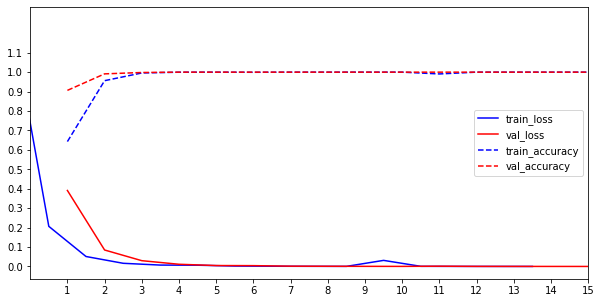

In [51]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

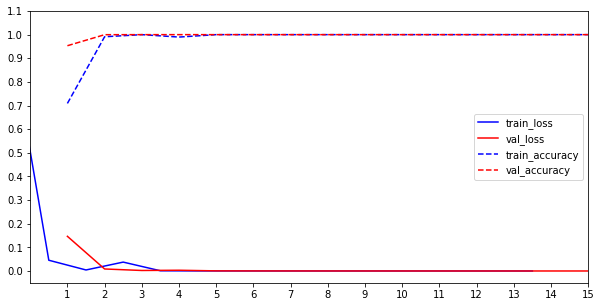

In [52]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

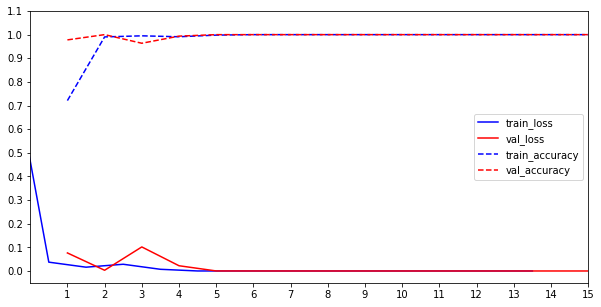

In [53]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

Model 3 is have the least loss on the validation data

### Feature Maps

Our Models now contains 3 pairs of Convolution and Pooling layers

Number of feature maps can be

1. 8 - 16 - 32
2. 16 - 32 - 64
3. 24 - 48 - 96

In [84]:
n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 1.2862 - accuracy: 0.6032

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 13s 16ms/step - loss: 1.2862 - accuracy: 0.6032 - val_loss: 0.2935 - val_accuracy: 0.9141
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9593

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 9s 16ms/step - loss: 0.1380 - accuracy: 0.9593 - val_loss: 0.0743 - val_accuracy: 0.9759
Epoch 3/10
607/610 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.9872

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 9s 15ms/step - loss: 0.0470 - accuracy: 0.9872 - val_loss: 0.0509 - val_accuracy: 0.9871
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9979

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 11s 18ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/10
604/610 [============================>.] - ETA: 0s - loss: 6.8334e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 10s 17ms/step - loss: 6.8063e-04 - accuracy: 1.0000 - val_loss: 5.1600e-04 - val_accuracy: 1.0000
Epoch 6/10
604/610 [============================>.] - ETA: 0s - loss: 3.9389e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 8s 13ms/step - loss: 3.9279e-04 - accuracy: 1.0000 - val_loss: 3.6458e-04 - val_accuracy: 1.0000
Epoch 7/10
610/610 [==============================] - ETA: 0s - loss: 2.3906e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 9s 14ms/step - loss: 2.3906e-04 - accuracy: 1.0000 - val_loss: 2.3030e-04 - val_accuracy: 1.0000
Epoch 8/10
605/610 [============================>.] - ETA: 0s - loss: 1.6341e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 7s 12ms/step - loss: 1.6373e-04 - accuracy: 1.0000 - val_loss: 1.6579e-04 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 1.1511e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 8s 14ms/step - loss: 1.1511e-04 - accuracy: 1.0000 - val_loss: 1.1253e-04 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - 7s 11ms/step - loss: 0.1020 - accuracy: 0.9696 - val_loss: 0.0568 - val_accuracy: 0.9823
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 1.1441 - accuracy: 0.6457

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 12s 17ms/step - loss: 1.1441 - accuracy: 0.6457 - val_loss: 0.2042 - val_accuracy: 0.9358
Epoch 2/10
606/610 [============================>.] - ETA: 0s - loss: 0.0792 - accuracy: 0.9764

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 8s 13ms/step - loss: 0.0788 - accuracy: 0.9766 - val_loss: 0.0106 - val_accuracy: 0.9997
Epoch 3/10
605/610 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9996

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 8s 14ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
608/610 [============================>.] - ETA: 0s - loss: 8.6171e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 9s 15ms/step - loss: 8.6873e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
604/610 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9863

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 9s 15ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 7.8805e-04 - val_accuracy: 1.0000
Epoch 6/10
605/610 [============================>.] - ETA: 0s - loss: 3.1687e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 8s 13ms/step - loss: 3.1626e-04 - accuracy: 1.0000 - val_loss: 2.6880e-04 - val_accuracy: 1.0000
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 1.5618e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 9s 14ms/step - loss: 1.5616e-04 - accuracy: 1.0000 - val_loss: 1.6740e-04 - val_accuracy: 1.0000
Epoch 8/10
605/610 [============================>.] - ETA: 0s - loss: 9.4205e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 8s 13ms/step - loss: 9.4174e-05 - accuracy: 1.0000 - val_loss: 1.0578e-04 - val_accuracy: 1.0000
Epoch 9/10
605/610 [============================>.] - ETA: 0s - loss: 6.3606e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 8s 12ms/step - loss: 6.3824e-05 - accuracy: 1.0000 - val_loss: 7.2740e-05 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 4.3726e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 6s 11ms/step - loss: 4.3781e-05 - accuracy: 1.0000 - val_loss: 5.2467e-05 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 0.9440 - accuracy: 0.7072

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 13s 20ms/step - loss: 0.9440 - accuracy: 0.7072 - val_loss: 0.1007 - val_accuracy: 0.9661
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0560 - accuracy: 0.9842

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 0.0560 - accuracy: 0.9843 - val_loss: 0.0209 - val_accuracy: 0.9960
Epoch 3/10
608/610 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9999

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 7.2013e-04 - val_accuracy: 1.0000
Epoch 4/10
605/610 [============================>.] - ETA: 0s - loss: 4.6963e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 8s 13ms/step - loss: 4.6816e-04 - accuracy: 1.0000 - val_loss: 3.4561e-04 - val_accuracy: 1.0000
Epoch 5/10
607/610 [============================>.] - ETA: 0s - loss: 2.5383e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 8s 12ms/step - loss: 2.5440e-04 - accuracy: 1.0000 - val_loss: 2.1135e-04 - val_accuracy: 1.0000
Epoch 6/10
604/610 [============================>.] - ETA: 0s - loss: 1.5354e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 8s 12ms/step - loss: 1.5301e-04 - accuracy: 1.0000 - val_loss: 1.5294e-04 - val_accuracy: 1.0000
Epoch 7/10
605/610 [============================>.] - ETA: 0s - loss: 1.0028e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 1.0031e-04 - accuracy: 1.0000 - val_loss: 1.0363e-04 - val_accuracy: 1.0000
Epoch 8/10
605/610 [============================>.] - ETA: 0s - loss: 6.5328e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 8s 13ms/step - loss: 6.5049e-05 - accuracy: 1.0000 - val_loss: 6.1038e-05 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 4.3536e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 4.3536e-05 - accuracy: 1.0000 - val_loss: 4.2570e-05 - val_accuracy: 1.0000
Epoch 10/10
607/610 [============================>.] - ETA: 0s - loss: 2.9967e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 7s 12ms/step - loss: 2.9911e-05 - accuracy: 1.0000 - val_loss: 3.0291e-05 - val_accuracy: 1.0000


In [85]:
models[0].summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 3, 3, 32)       

In [86]:
models[1].summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 3, 3, 64)       

In [87]:
models[2].summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 3, 3, 96)       

In [88]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 5ms/step - loss: 3.0291e-05 - accuracy: 1.0000


In [89]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

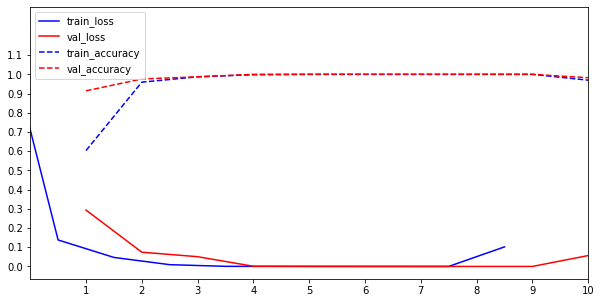

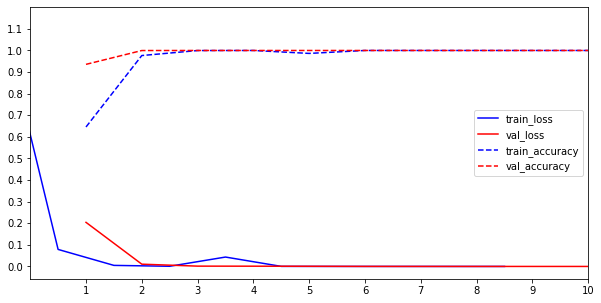

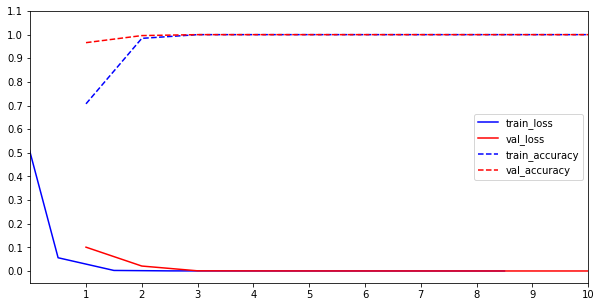

In [90]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choose Model 3